In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Lecture 27 and 28 ##

## Central Limit Theorem:
## Mean and Variability  of Sample Means

In [2]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [3]:
united.num_rows

13825

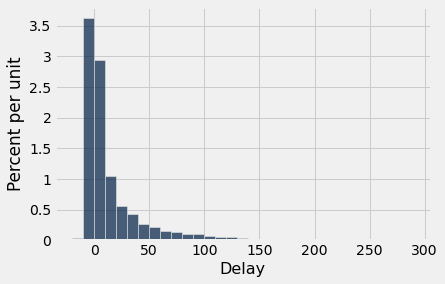

In [4]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [5]:
delays = united.column('Delay')
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [6]:
percentile(50, delays)

2

In [7]:
sample_size = 400

means_400 = make_array()

for i in np.arange(10000):
    sampled_flights = united.sample(sample_size)
    sample_mean = np.mean(sampled_flights.column('Delay'))
    means_400 = np.append(means_400, sample_mean)

In [8]:
sample_size = 900

means_900 = make_array()

for i in np.arange(10000):
    sampled_flights = united.sample(sample_size)
    sample_mean = np.mean(sampled_flights.column('Delay'))
    means_900 = np.append(means_900, sample_mean)

In [9]:
means_tbl = Table().with_columns(
    'Sample size 400', means_400,
    'Sample size 900', means_900
)

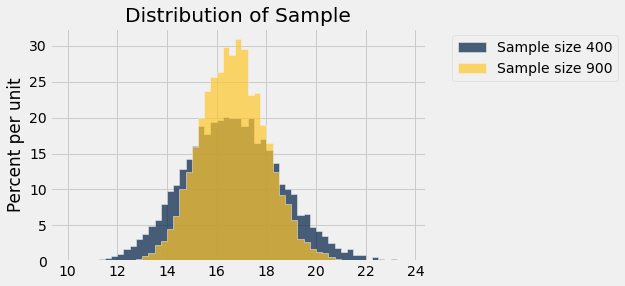

In [10]:
means_tbl.hist(bins = np.arange(10, 24, 0.25))
plots.title('Distribution of Sample');

In [11]:
"""Empirical distribution of random sample means"""

def sample_means(sample_size):
    
    repetitions = 10000
    means = make_array()

    for i in range(repetitions):
        sampled_flights = united.sample(sample_size)
        sample_mean = np.mean(sampled_flights.column('Delay'))
        means = np.append(means, sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.619591
Population SD: 39.480199851609314
SD of sample means: 3.9536497951537135


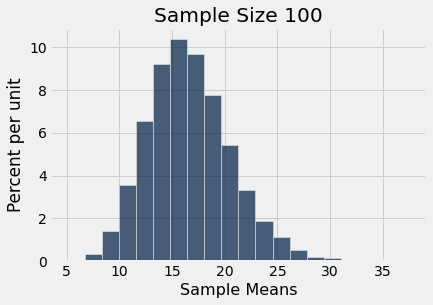

In [12]:
sample_means(100)

In [13]:
sample_sizes = np.arange(100, 401, 50)

mean_of_sample_means = make_array()
sd_of_sample_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(10000):
        means = np.append(means, np.mean(united.sample(n).column('Delay')))
    sd_of_sample_means = np.append(sd_of_sample_means, np.std(means))
    mean_of_sample_means = np.append(mean_of_sample_means, np.mean(means))

In [14]:
mean_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'Pop_Mean', mean_delay,
    'Mean of 10,000 Sample Means', mean_of_sample_means
   
)

In [15]:
mean_comparison

Sample Size n,Pop_Mean,"Mean of 10,000 Sample Means"
100,16.6582,16.695
150,16.6582,16.6455
200,16.6582,16.6286
250,16.6582,16.6639
300,16.6582,16.6457
350,16.6582,16.67
400,16.6582,16.6524


In [16]:
sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'Pop_SD', sd_delay,
    'SD of 10,000 Sample Means', sd_of_sample_means,
    'Pop_SD/sqrt(n)', sd_delay/np.sqrt(sample_sizes)
   )

In [17]:
sd_comparison

Sample Size n,Pop_SD,"SD of 10,000 Sample Means",Pop_SD/sqrt(n)
100,39.4802,3.98263,3.94802
150,39.4802,3.19522,3.22354
200,39.4802,2.81596,2.79167
250,39.4802,2.50806,2.49695
300,39.4802,2.25817,2.27939
350,39.4802,2.11707,2.11031
400,39.4802,1.97835,1.97401


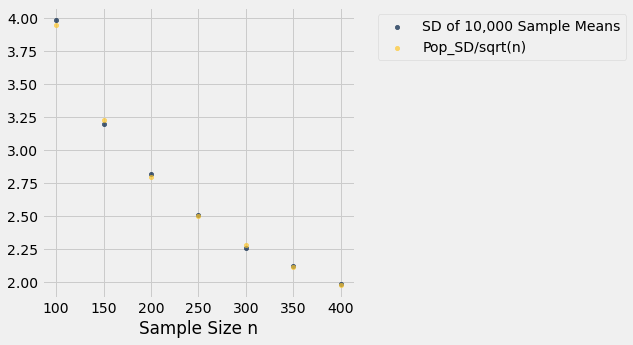

In [18]:
sd_comparison.drop('Pop_SD').scatter('Sample Size n')

## Lecture 28 ##

## To illustrate that SD of 0/1 Population is 0.5 or less

In [19]:
# Population of size 10

ones = 5
zero_one_population = np.append(np.ones(ones), np.zeros(10 - ones))
zero_one_population

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [20]:
np.std(zero_one_population)

0.5

In [21]:
pop_proportions = make_array()
pop_SDs = make_array()

for k in np.arange(1, 10):
    population = np.append(np.ones(k), np.zeros(10 - k))
    population_SD = np.std(population)
    pop_SDs = np.append(pop_SDs, population_SD)
    pop_proportions = np.append(pop_proportions, k/10)
    
sd_table = Table().with_columns(
    'Population Proportion', pop_proportions,
    'Population SD', pop_SDs
)

sd_table

Population Proportion,Population SD
0.1,0.3
0.2,0.4
0.3,0.458258
0.4,0.489898
0.5,0.5
0.6,0.489898
0.7,0.458258
0.8,0.4
0.9,0.3


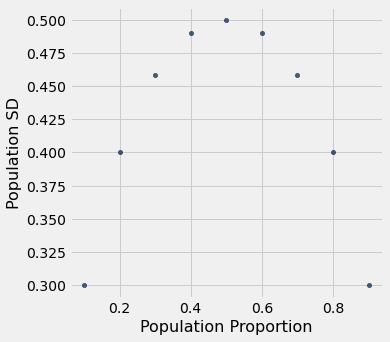

In [22]:
sd_table.scatter(0)